# Deep Learning for Text Depression

---



##1.0 Importing Packages

In [ ]:
!pip install ftfy # command to install ftfy
import nltk
nltk.download('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.1 MB/s 


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

##Import Packages

In [ ]:
import matplotlib.pyplot as plt # import matplotlib.pyplot for graph plotting
#from textblob import TextBlob
import pandas as pd # import pandas for dataframe and read csv file
import numpy as np # import numpy for array
import seaborn as sns

import re # import reinforcement learning
import warnings # import warnings
warnings.filterwarnings("ignore")
import ftfy # import ftfy

from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score # import these for model performance plotting
from sklearn.model_selection import train_test_split # used to split data into train and test
from gensim.models import KeyedVectors

import nltk # import natural language tool kit
from nltk.corpus import stopwords # import english stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer # import porterstemmer and wordnetlemmatize
from nltk.tokenize import WordPunctTokenizer # import wordpuncttokenizer
tok = WordPunctTokenizer() # for tokenization
wo = WordNetLemmatizer() # for lemmatization

from keras import optimizers # import optimizers
from keras.models import Model, Sequential # for build model
from keras.callbacks import EarlyStopping, ModelCheckpoint # Used when training model
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D # Import model layers
from keras.preprocessing.text import Tokenizer # To tokenize each words into unique words
from keras.preprocessing.sequence import pad_sequences # Convert into array of integers

##Load Data from CSV File

In [ ]:
sheet_id = '1imqy0dHajEETyEa0lHpouj-1qvhG30jgGiZ6DEtyBhk' # google sheet unique ID
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv") # link to read csv file
df = df.drop('Unnamed: 0',axis=1) # drop column named 'Unnamed'
df_tweets = df['Tweets'] # store data in 'Tweets' column

df.head()

,Tweets,Depression
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
df.tail()

,Tweets,Depression
10201,Many sufferers of depression aren't sad; they ...,1
10202,No Depression by G Herbo is my mood from now o...,1
10203,What do you do when depression succumbs the br...,1
10204,Ketamine Nasal Spray Shows Promise Against Dep...,1
10205,dont mistake a bad day with depression! everyo...,1


[Text(0.5, 1.0, 'Number of Tweets Against Depression')]

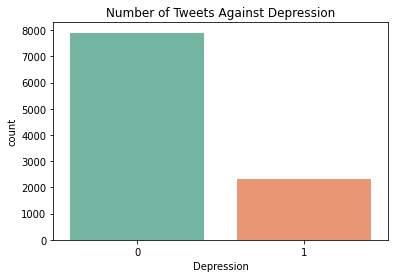

In [ ]:
sns.countplot(x="Depression", data=df, palette='Set2').set(title="Number of Tweets Against Depression") 
# plot bar chart to show number of tweets that are depressive and non-depressive

##Preprocessing Data

In [ ]:
maxSequenceLength = 140 # Max tweet/status/story input size
maxNBWords = 20000 # max number
embeddingDim = 300 # embedding dim
learningRate = 0.1 # alpha value of learning rate
epochs = 10 # number of epochs

In [ ]:
# Expand Contraction
cList = {"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have",
        "didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not","he'd": "he would",
        "he'd've": "he would have","he'll": "he will","he'll've": "he will have","he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is",
        "I'd": "I would","I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","isn't": "is not","it'd": "it had","it'd've": "it would have",
        "it'll": "it will","it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have",
        "must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
        "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will",
        "she'll've": "she will have","she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so is","that'd": "that would",
        "that'd've": "that would have","that's": "that is","there'd": "there had","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have",
        "they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we had","we'd've": "we would have",
        "we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not","what'll": "what will","what'll've": "what will have","what're": "what are",
        "what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is","where've": "where have","who'll": "who will",
        "who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","won't've": "will not have",
        "would've": "would have","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'alls": "you alls","y'all'd": "you all would","y'all'd've": "you all would have",
        "y'all're": "you all are","y'all've": "you all have","you'd": "you had","you'd've": "you would have","you'll": "you you will","you'll've": "you you will have","you're": "you are",
        "you've": "you have"} # list of dictionary where keys are short form and values are expanded form

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re): # function to expand contractions using cList dictionary
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)
    

In [ ]:
# to remove unnecessary characters or words
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"} # list of dictionary where keys are short form and values are expanded form
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [ ]:
# function to get clean tweets by removing unneccessary words and characters
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        # remove tweets that have URL links
        if re.match("(\w+:\/\/\S+)", tweet) == None:
            tweet = re.sub(r"http\S+", "", tweet)
            tweet = re.sub(r'www.+', "", tweet)
            # remove hashtags, @mention, emoji and image URLs
            tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())
            # remove HTML special entities (e.g. &amp;)
            tweet = re.sub(r'\&\w*;', '', tweet)
            # convert @username to AT_USER
            tweet = re.sub('@[^\s]+','',tweet)
            # remove tickers
            tweet = re.sub(r'\$\w*', '', tweet)
            # change tweets to lowercase
            tweet = tweet.lower()
            # remove hyperlinks
            tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
            # remove words with 2 or fewer letters
            tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
            # remove whitespace (including new line characters)
            tweet = re.sub(r'\s\s+', ' ', tweet)
            # Remove single space remaining at the front of the tweet.
            tweet = tweet.lstrip(' ') 
            # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
            tweet = ''.join(c for c in tweet if c <= '\uFFFF')
            #fix weirdly encoded texts
            tweet = ftfy.fix_text(tweet)
            # call expandContractions Function
            tweet = expandContractions(tweet)
            #remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())
            
            neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], tweet)
            letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
            
            # Tokenize and join to remove unneccessary white spaces
            words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
            # return (" ".join(words)).strip()

            #stop words
            stop_words = set(stopwords.words('english'))
            stop_words.update(("mon","tue","wed","thu","fri","sat","sun","sunday","monday","tuesday","thursday","friday","saturday","sunday","thurs","thur","tues"))
            stop_words.update(("january","february","march","april","may","june","july","august",
              "september","october","november","december","jan","feb","mar","apr",
              "may","jun","jul","aug","sep","oct","nov","dec", "twitter", "thanking","thanks"))
    
            word_tokens = nltk.word_tokenize(tweet) 
            filtered_sentence = [w for w in word_tokens if not w in stop_words] # remove stopwords found in tweets
            tweet = ' '.join(filtered_sentence)

            #stemming words
            tweet = PorterStemmer().stem(tweet)
            
            # append final clean tweet into the list
            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [ ]:
X = clean_tweets(df_tweets) # call clean_tweets function
print("Clean Tweets : \n" + str(X))
print("Number of Clean Tweets Found : " + str(len(X)))
Y = df['Depression'].to_numpy() # convert 'Depression' columns values to Y

Clean Tweets : 
['real good moment missssssssss much', 'reading manga', '', 'need send accountant tomorrow oddly even referring taxes supporting evidence though', 'add myspace myspace com lookthund', 'sleepy good times tonight though', 'someone already said fiber home mean least regular', '24 possible today nic', 'nite twitterville workout ciao', 'night darlin sweet dream', 'good morning everybodi', 'finally created wordpress blog already blog seattle coffee commun', 'kisha cnt get til get frm remember top', 'yes remember band awesome please repli', 'really love reflections shadow', 'ooo fantasy like fantasy novels check', 'probs sell nothing blog get listen band itun', 'nokla connecting peopl', 'stayed late start early good thing like job', 'penn read new job congratulations fantast', 'able sleep think watch ugly betty onlin', 'woo ron steeve following yeow folowerssss haha wan na got ellen show', 'yeah sure sister take extra car', 'mouse yay duck want anything watching duck lol', 'sm

In [ ]:
from collections import Counter # import counter to get the frequency of each word
def counter_word(text_col):
    count = Counter()
    for text in text_col:
        for word in text.split():
            count[word] += 1
    return count

In [ ]:
print('Most Common Words with Frequency :')
counter = counter_word(X)
counter.most_common(5)

Most Common Words with Frequency :


[('depression', 1782),
 ('good', 700),
 ('day', 596),
 ('like', 509),
 ('get', 489)]

##Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=maxNBWords) # tokenize each words to specific integer 
tokenizer.fit_on_texts(X) # apply on each tweets

In [ ]:
word_index = tokenizer.word_index # index of each word
print(word_index)
print('Found %s unique tokens' % len(word_index))

{'depression': 1, 'good': 2, 'day': 3, 'like': 4, 'get': 5, 'love': 6, 'depress': 7, 'lol': 8, 'know': 9, 'today': 10, 'got': 11, 'going': 12, 'time': 13, 'one': 14, 'great': 15, 'new': 16, 'anxiety': 17, 'back': 18, 'see': 19, 'night': 20, 'think': 21, 'work': 22, 'much': 23, 'really': 24, 'well': 25, 'haha': 26, 'people': 27, 'happy': 28, 'na': 29, 'hope': 30, 'would': 31, 'feel': 32, 'thank': 33, 'fun': 34, 'need': 35, 'hey': 36, 'right': 37, 'way': 38, 'make': 39, 'life': 40, 'want': 41, 'last': 42, 'still': 43, 'morning': 44, 'tomorrow': 45, 'gon': 46, 'watching': 47, 'never': 48, 'best': 49, 'wait': 50, 'nice': 51, 'help': 52, 'even': 53, 'better': 54, 'home': 55, 'getting': 56, 'first': 57, 'come': 58, 'take': 59, 'say': 60, 'could': 61, 'yeah': 62, 'let': 63, 'someone': 64, 'follow': 65, 'yes': 66, 'cool': 67, 'made': 68, 'friend': 69, 'everyone': 70, 'awesome': 71, 'tweet': 72, 'tonight': 73, 'show': 74, 'lov': 75, 'mental': 76, 'sure': 77, 'week': 78, 'something': 79, 'world'

In [ ]:
sequences_d = tokenizer.texts_to_sequences(X) # convert tweets to sequence of integers
print(sequences_d)

[[113, 2, 509, 5964, 23], [353, 5965], [], [35, 396, 5966, 45, 5967, 53, 1770, 5968, 1370, 1033, 87], [447, 580, 580, 175, 5969], [947, 2, 247, 73, 87], [64, 156, 149, 5970, 55, 198, 171, 1126], [5971, 1127, 10, 581], [582, 3890, 1034, 5972], [20, 5973, 199, 491], [2, 44, 2391], [121, 1128, 2392, 230, 156, 230, 1243, 306, 3891], [5974, 2393, 5, 583, 5, 2955, 282, 337], [66, 282, 414, 71, 101, 1129], [24, 6, 5975, 3892], [1771, 3893, 4, 3893, 3894, 110], [2041, 2394, 133, 230, 5, 223, 414, 3895], [5976, 2395, 584], [2396, 289, 141, 182, 2, 102, 4, 146], [3896, 124, 16, 146, 761, 2956], [415, 89, 21, 88, 1552, 3897, 1130], [585, 3898, 5977, 397, 5978, 5979, 26, 159, 29, 11, 3899, 74], [62, 77, 870, 59, 1244, 210], [3900, 91, 2397, 41, 211, 47, 2397, 8], [5980, 283, 5981, 39, 338, 2957, 5982, 5983, 5984], [585, 289, 26, 239, 2042, 465], [116, 267, 762, 2398, 3901, 427], [9, 5985, 2399, 5986, 2400, 5987, 2401], [2043, 19, 550, 5988, 466], [20, 2402, 11, 3902, 102, 110, 871], [11, 1553, 295

In [ ]:
X_d = pad_sequences(sequences_d, maxlen=maxSequenceLength) 
# pad the sequence of integers of tweet

##Word Embedding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
word2vec = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300 (1).bin.gz', binary=True) 
# get word to vector from the link

In [ ]:
#The embedding matrix
nb_words = min(maxNBWords, len(word_index)) + 1

embedding_matrix = np.zeros((nb_words, embeddingDim)) # initialise embedding matrix with all zeros

for (word, idx) in word_index.items():
    if word in word2vec.wv.vocab and idx < maxNBWords:
        embedding_matrix[idx] = word2vec.word_vec(word) # assign word vector into embedding matrix

print("Embedding Matrix : \n" + str(embedding_matrix))

Embedding Matrix : 
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.12158203 -0.17089844 -0.41601562 ...  0.2421875   0.2890625
   0.02062988]
 [ 0.04052734  0.0625     -0.01745605 ... -0.15625     0.00193024
  -0.06982422]
 ...
 [ 0.24316406  0.25390625 -0.15722656 ... -0.07373047  0.22851562
  -0.06933594]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.22167969  0.171875   -0.24414062 ...  0.06494141  0.3828125
   0.54296875]]


##Training and Testing Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_d,Y,test_size=0.2,random_state=42)
# split data into 80% training and 20% testing
print('Shape of training samples:',X_train.shape,y_train.shape)
print('Shape of testing samples:',X_test.shape,y_test.shape)

Shape of training samples: (8164, 140) (8164,)
Shape of testing samples: (2042, 140) (2042,)


In [ ]:
model = Sequential() # initialise model
# Embedded layer
model.add(Embedding(len(embedding_matrix), embeddingDim, weights=[embedding_matrix], 
                            input_length=maxSequenceLength, trainable=False))
# Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
# LSTM Layer
model.add(LSTM(300))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 300)          4464000   
                                                                 
 conv1d (Conv1D)             (None, 140, 32)           28832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 70, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 70, 32)            0         
                                                                 
 lstm (LSTM)                 (None, 300)               399600    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                        

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3) # call early stop if the val_loss does not decrease after 3 times

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=epochs, batch_size=40, shuffle=True, callbacks=[early_stop])
# train and test the model

Epoch 1/10
205/205 [==============================] - 72s 351ms/step - loss: 0.0083 - acc: 0.9977 - val_loss: 0.0906 - val_acc: 0.9887
Epoch 2/10
205/205 [==============================] - 72s 351ms/step - loss: 0.0072 - acc: 0.9982 - val_loss: 0.1006 - val_acc: 0.9868
Epoch 3/10
205/205 [==============================] - 71s 348ms/step - loss: 0.0085 - acc: 0.9978 - val_loss: 0.1131 - val_acc: 0.9887
Epoch 4/10
205/205 [==============================] - 73s 355ms/step - loss: 0.0233 - acc: 0.9967 - val_loss: 0.0735 - val_acc: 0.9882
Epoch 5/10
205/205 [==============================] - 72s 349ms/step - loss: 0.0083 - acc: 0.9973 - val_loss: 0.0893 - val_acc: 0.9873
Epoch 6/10
205/205 [==============================] - 72s 351ms/step - loss: 0.0092 - acc: 0.9979 - val_loss: 0.0895 - val_acc: 0.9902
Epoch 7/10
205/205 [==============================] - 72s 349ms/step - loss: 0.0072 - acc: 0.9978 - val_loss: 0.0966 - val_acc: 0.9838


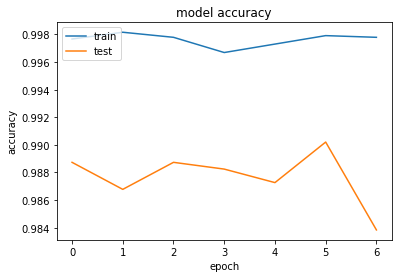

In [ ]:
#plot line graph to represent model accuracy for training and testing
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

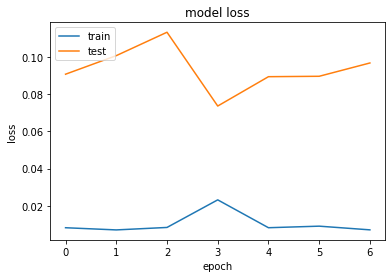

In [ ]:
#plot line graph to represent model accuracy for training and testing
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Prediction Using Model

In [ ]:
text = "I have my two best friends and both of them are so loving & encouraging. \
        We texted a few times a week before the pandemic, but I knew it was super stressful for them \
        with kids at home and work etc. I didn't expect for my mood to bottom out like it did.\
        I am still extremely isolated because of me having a serious immune system deficiency.\
        didn't exactly notice my decline, except I started having mixed episodes. \
        One of my friends is also type 2 bipolar. She just gets me in a way others don't. \
        She can truly empathize with me because she lives it too. It also helps me feel useful to\
        let them vent or help them through something. I am disabled and I feel very useless at times, so knowing I help them helps me"

tester = np.array([text])
tester = pd.DataFrame(tester)
tester.columns = ['text']

tester['text'] = tester['text'].apply(lambda x: x.lower())
tester['text'] = tester['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

test = tokenizer.texts_to_sequences(tester['text'].values)
test = pad_sequences(test)

if X_train.shape[1]>test.shape[1]:
    test = np.pad(test[0], (X_train.shape[1]-test.shape[1],0), 'constant')
    
test = np.array([test])

prediction = model.predict(test)
print(prediction)
if prediction[0]<0.5:
    print('Positive Text :)')
elif prediction[0]>0.5:
    print('Depressive Text :(')

[[0.9999502]]
Depressive Text :(


#Random Forest Classifier for Questionnaire

##Import Packages

In [ ]:
import pandas as pd # import pandas to work with Dataframe
import numpy as np # import numpy
import seaborn as sns
from sklearn.model_selection import train_test_split # import to split data into train and test
from sklearn.ensemble import RandomForestClassifier # import random forest classifier model
from sklearn import metrics # import metrics to get model accuracy
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
# import metrics to meausre model performance

import matplotlib.pyplot as plt # import matplotlib to plot graph
from sklearn import tree # import tree

In [ ]:
sheet_id = '1ikpEEqKiyIdWwQTOJHFlAVVKeGpOIZKFz9hkMVHgyhI' # csv file id
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv") # use pandas to read csv file
df = df.drop('Timestamp',axis=1) # drop column named 'Timestamp'
df = df.drop('Weightage',axis=1) # drop column named 'Weightage'
df.head()

,Are you having little interest in doing your daily routine,Do you feel useless and wasteful for others at times,Are you feeling down or depressed sometimes,Do you have the feeling of committing a suicide because you are very frustrated with everything,Do you feel confident when you carry out things that you do it daily,"During bedtime, do you have trouble sleeping or experience a very bad nightmare in your sleep",Do you have the guts to talk about all your problems to others,Do you have the feeling of leaving everything behind and running from your house,Do you feel hungry even though you just had your food recently,Do you like going out and spending time with your closed ones,Depression level
0,4,4,4,4,4,4,4,4,2,4,3
1,4,3,2,4,3,4,4,3,2,1,3
2,3,2,1,3,4,3,4,3,3,3,1
3,2,4,3,1,3,3,3,3,2,4,2
4,4,4,4,4,4,3,3,4,3,4,3


[Text(0.5, 1.0, 'Number of Responses against Depression Level')]

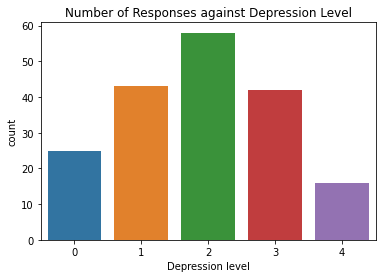

In [ ]:
sns.countplot(df['Depression level']).set(title="Number of Responses against Depression Level")

In [ ]:
X = df.drop('Depression level',axis=1).values # Get all inputs of the questionnaire in array form
Y = df['Depression level'].values # Get all outputs of the questionnaire in array form

print("X values : \n" + str(X)) # print X values
print("\nY values : \n" + str(Y)) # print Y values

X values : 
[[4 4 4 ... 4 2 4]
 [4 3 2 ... 3 2 1]
 [3 2 1 ... 3 3 3]
 ...
 [1 3 3 ... 1 3 4]
 [1 2 2 ... 1 1 3]
 [3 2 4 ... 3 1 4]]

Y values : 
[3 3 1 2 3 2 3 3 3 1 1 1 1 2 3 2 2 2 3 2 2 3 2 1 1 2 2 1 2 1 3 4 3 3 0 2 3
 2 3 4 3 2 3 2 2 1 1 1 2 2 3 3 2 2 0 2 4 2 2 2 4 4 4 3 1 4 4 2 1 4 0 2 1 2
 1 0 0 3 0 1 1 1 2 4 2 1 3 0 0 2 1 1 3 4 2 2 2 3 2 2 2 2 1 2 3 2 3 3 2 3 3
 3 3 3 0 2 3 2 1 3 1 1 1 1 2 1 1 3 0 0 1 2 1 0 0 4 4 4 0 2 2 1 3 2 1 3 0 1
 3 2 0 1 0 2 3 0 2 1 2 2 2 0 2 0 3 4 0 3 1 1 1 3 0 3 2 1 2 1 0 4 1 0 0 2]


In [ ]:
#split data of 20% for testing and 80% for training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Classifier = RandomForestClassifier(n_estimators=10)
Classifier = Classifier.fit(x_train, y_train)

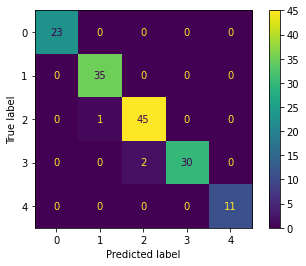

In [ ]:
plot_confusion_matrix(Classifier,x_train,y_train) # plot confusion matrix
plt.show()

In [ ]:
y_pred = Classifier.predict(x_test).astype(int) # Validating/Testing Data
print("Classification Report : \n")
print(classification_report(y_test,y_pred)) # Output Classification Report
print("\nAccuracy Score : \n")
print(accuracy_score(y_test, y_pred)) # Output model accuracy score

Classification Report : 

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.60      0.75      0.67         8
           2       0.71      0.42      0.53        12
           3       0.62      0.80      0.70        10
           4       1.00      0.80      0.89         5

    accuracy                           0.65        37
   macro avg       0.65      0.65      0.64        37
weighted avg       0.68      0.65      0.64        37


Accuracy Score : 

0.6486486486486487


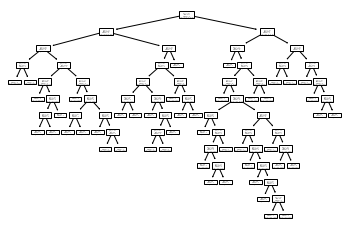

In [ ]:
fig = plt.figure()
tree.plot_tree(Classifier.estimators_[9])
plt.show()

In [ ]:
values = [[1,2,1,2,1,1,0,1,1,0]] # Responses from Questionnaire
result = Classifier.predict(values)[0]

resultDict = {0:'No Depression', 1:'Mild Depression', 2:'Moderate Depression', 3:'Moderately Severe Depression', 4:'Severe Depression'}
print("Result is " + str(result) + " : " + str(resultDict[result])) # print result

Result is 1 : Mild Depression
